In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import math
from typing import Any, Dict, List, Optional

import rasterio
import contextily
import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests

from huhuha.settings import DATA_DIR

color_pallette = 'muted'
sns.set_theme(style='whitegrid', font_scale=1.5, palette=color_pallette, 
              rc={'font.family': 'serif', 'font.serif': 'Times New Roman', 'mathtext.fontset': 'dejavuserif'})

In [2]:
avalnache_data_path =  DATA_DIR / 'data-avalanche.csv'
df = pd.read_csv(avalnache_data_path)

In [3]:
with pd.option_context('display.max_columns', None):
    display(df.head())

,id,date,massif,sommet,itineraire,description,orientation,caracteristique,origine_principale,origine_secondaire,type_ecoulement_principal,qualite_neige,risque_meteo_france,latitude,longitude,thumbnail,imagesNb,isPrivate,tags,updated,altitude_depart,altitude_arrivee
0,1642072642225,1641942000000,aiguilles d arves,Aiguille de l'Epaisseur,NaN,"b""Apres s'etre decale trop sur la gauche par r...",E,b'',"Ski touring, uphill",NaN,NaN,NaN,Inconnu,45.130920,6.357383,/attached-files/thumbnails/1642072461149-IMG20...,2,False,NaN,1642074353000,3100,0
1,1642001062328,1641942000000,NaN,NaN,Mont Joly,b'Descente du Pcheu au Mont Joly. \r\nDeclench...,E,b'',NaN,NaN,NaN,NaN,Inconnu,45.825902,6.693000,/attached-files/thumbnails/1642000995871-6792F...,1,False,NaN,1642013122000,2500,1180
2,1642005733893,1641855600000,Haute Maurienne,Pointe de Vallonbrun,NaN,"b""Petite avalanche partie spontanement, probab...",SE,b'Wind slab',NaN,NaN,NaN,NaN,3 - MARQUE,45.317667,6.937318,/attached-files/thumbnails/1642005733893-16420...,2,False,NaN,1642005978000,2630,2240
3,1641931532871,1641855600000,Belledonne,pointe du sciallet,"Sommet du sciallet par l'éperon est, permettan...","b""Declenchement de la plaque par 1 skieur. \r\...",E,b'',"Ski touring, downhill",NaN,NaN,NaN,Inconnu,45.212236,6.013909,/attached-files/thumbnails/1641931326001-inbou...,3,False,NaN,1641931532000,2300,2200
4,1641918131562,1641855600000,Mont Thabor,Roche de la Pelle,NaN,"b""Avalanche spontanee partie tres probablement...",NE,b'Soft slab',NaN,NaN,Aerosol,NaN,3 - MARQUE,45.136030,6.551387,/attached-files/thumbnails/1641918131562-16419...,5,False,NaN,1641918700000,2820,2450


In [4]:
df = df.drop(df[(df.latitude == 0.0) | (df.longitude == 0.0)].index)

In [5]:
df = df.drop(df[(df.latitude == 0.0) | (df.longitude == 0.0)].index)
df['date_formated'] = df.date.apply(lambda d: pd.to_datetime(d, unit='ms'))
df['date_updated_formated'] = df.updated.apply(lambda d: pd.to_datetime(d, unit='ms'))

In [6]:
columns_to_keep = ['id', 'date', 'updated', 'massif', 'sommet', 'description', 'orientation', 'latitude', 'longitude']
df = df[columns_to_keep]

In [7]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"))

In [8]:
gdf.head(2)

,id,date,updated,massif,sommet,description,orientation,latitude,longitude,geometry
0,1642072642225,1641942000000,1642074353000,aiguilles d arves,Aiguille de l'Epaisseur,"b""Apres s'etre decale trop sur la gauche par r...",E,45.130920,6.357383,POINT (6.35738 45.13092)
1,1642001062328,1641942000000,1642013122000,NaN,NaN,b'Descente du Pcheu au Mont Joly. \r\nDeclench...,E,45.825902,6.693000,POINT (6.69300 45.82590)


In [9]:
# gdf2 = gdf[(gdf.latitude > 0.0) & (gdf.latitude < 60.0) & (gdf.longitude > 0.0) & (gdf.longitude < 20.0)]

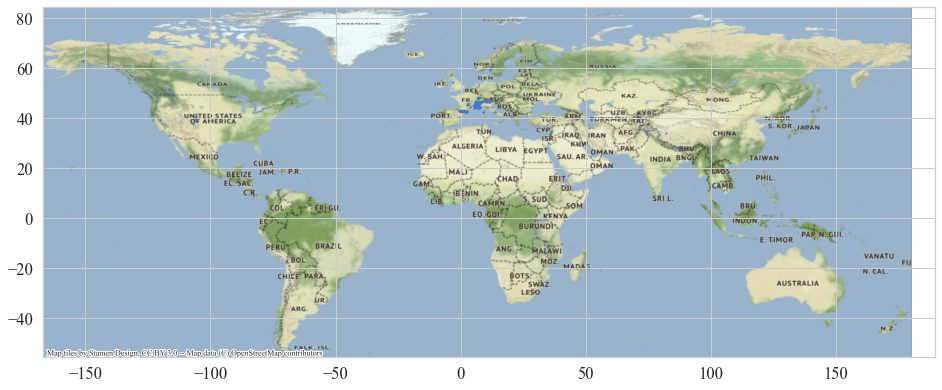

In [10]:
ax = gdf.plot(markersize=1,figsize=(16, 10))
contextily.add_basemap(ax, crs=gdf.crs.to_string())

In [11]:
gdf_europe = gdf[(gdf.latitude > 15) & (gdf.latitude < 70.0) & (gdf.longitude > - 15.0) & (gdf.longitude < 40.0)]

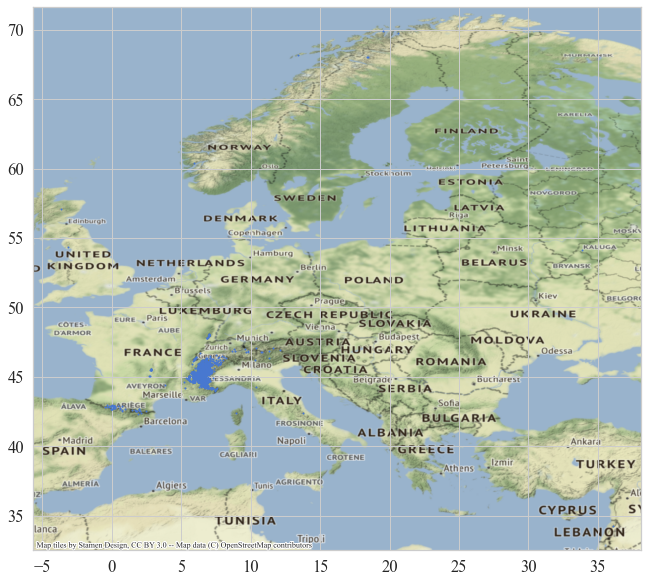

In [12]:
ax = gdf_europe.plot(markersize=1,figsize=(12, 10))
contextily.add_basemap(ax, crs=gdf_europe.crs.to_string())

In [13]:
gdf_french_alps = gdf[(gdf.latitude > 44) & (gdf.latitude < 47.5) & (gdf.longitude > 5) & (gdf.longitude < 8.5)]

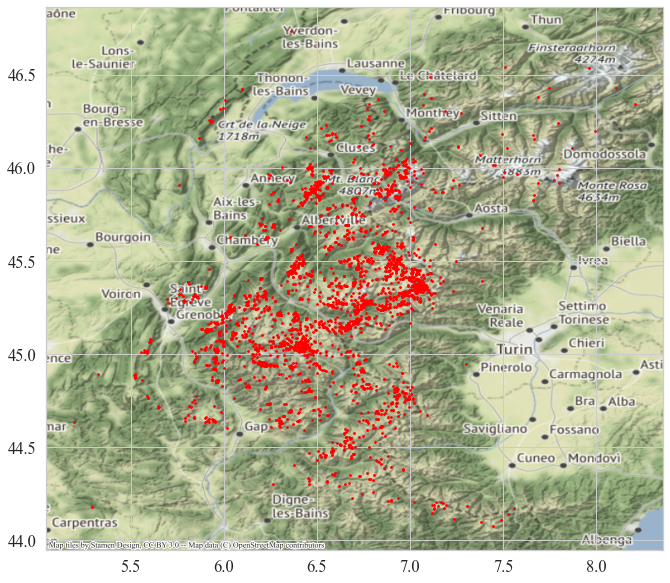

In [14]:
ax = gdf_french_alps.plot(markersize=3, color='red', figsize=(12, 10))
contextily.add_basemap(ax, crs=gdf_french_alps.crs.to_string())